In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import copy

In [2]:
%run ../codes/branchingv1.py

In [3]:
WN = np.loadtxt('W_avg.csv')
Cave = np.loadtxt('Cave.csv')
pop = np.loadtxt('pop_new.csv')

In [15]:
num_fips = len(pop)
T = 40
num_ens = 100 ##300

In [ ]:
# compute wji make the transission rate(probability)
# mobility factor
theta = 1
W = np.zeros_like(Cave)
WN = np.zeros_like(Cave)
for i in range(num_fips):
    non_dia = np.delete(idx, i)
    W[non_dia,i] = Cave[non_dia,i]/pop[i] 
    W[i,i] = max((1-np.sum(W[non_dia,i])),0.2) ## the maxium probability travel within is 0.2
    WN[:,i] = W[:,i]/np.sum(W[:,i]) ## normalise distribution

In [ ]:
np.savetxt('W_avg.csv',WN)

In [8]:
# pathogen characteristics
# initialize parameters
R0 = 2.5 
r = 5 ## the parameters
Z = 3 # latent period
Zb = 1 # scale parameter for Z
D = 5 # infectious period
Db = 1 # scale parameter for b
alpha = 0.1 # reporting rate 10%
# R0,r,Z;Zb;D;Db,alpha
para_i = np.array([[R0], [r], [Z], [Zb], [D], [Db], [alpha]])

In [9]:
para = np.repeat(para_i,300,axis=1)

In [16]:
#initialize variables
# seeding
l0 = 1859-1 # start with New York County NY in python -1, in matlab is 1859
i0 = 100 ## the starting t=0, in matlab it is 1
initials = (l0,i0)

In [11]:
x_cutoff = 100
r = 5 ## parameters (in the paper of Lloyd smith is the k)
R0 = 2.5  ## the model input

p = r/(R0+r)

weights = np.zeros(x_cutoff)
for i in range(x_cutoff):
    temp1=SS.gamma(r+i)/SS.gamma(r)/SS.gamma((i+1))*np.power(p,r)*np.power((1-p),i)
    weights[i] = temp1
weights_n = weights/np.sum(weights)

In [12]:
print('it covers', np.sum(weights)*100,'% of the values') 

it covers 100.0 % of the values


In [19]:
E_NewInf = np.zeros((num_ens, num_fips,T*10))
E_TotInf = np.zeros((num_ens, num_fips,T*10))

In [20]:
for en_i in range(num_ens):
    E_NewInf[en_i], E_TotInf[en_i] = superspreading_T_Loc(40,num_fips,(l0,i0),weights_n,pop,(3,1,5,1),WN)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
2

In [27]:
np.save('NewInf_r_5',E_NewInf)

In [31]:
E_NewInf[0,1858,:40]

array([ 100.,    0.,    9.,   17.,   24.,   24.,   32.,   29.,   28.,
         42.,   32.,   37.,   54.,   37.,   35.,   75.,   63.,   68.,
         71.,   80.,   95.,  122.,  123.,  139.,  180.,  182.,  204.,
        279.,  313.,  348.,  417.,  517.,  560.,  657.,  774.,  839.,
        991., 1223., 1510., 1684.])

In [21]:
NewInf_avg = np.mean(E_NewInf,axis=0)

In [22]:
NewInf_as = NewInf_avg[:,:60]
daily_per_pop = NewInf_as/pop[:,None]*100000

In [ ]:
NewInf1 = np.loadtxt('NewInf_r_5.csv')
NewInf_s1 = NewInf1[:,:60]
daily_per_pop1 = NewInf_s1/pop[:,None]*100000

(0.0, 40.0)

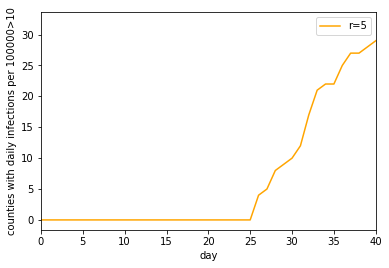

In [25]:
# plt.plot(np.sum(daily_per_pop1>10,axis=0),label='r=0.1',color='green')
plt.plot(np.sum(daily_per_pop>10,axis=0),label='r=5',color='orange')
plt.legend()
plt.xlabel('day')
plt.ylabel('counties with daily infections per 100000>10')
plt.xlim(0,40)